In [2]:
def headmap(scores, name=''):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn
    fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharey=True)
    vmin = np.nanmin(scores)
    vmax = np.nanmax(scores)

    seaborn.heatmap(scores, ax=ax, square=False, cbar=False, annot=True, fmt='.2f', vmin=vmin, vmax=vmax)
    # Remove only the ticks, keep labels
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=0)
    ax.set_title(name, pad=10)


    plt.tight_layout()

In [6]:
import pandas as pd
import yaml

# Load the YAML file
result_file = '../resources/results/0/scores.yaml'
with open(result_file, 'r') as file:
    data = yaml.safe_load(file)

# Initialize a dictionary to hold DataFrames for each method_id
dfs = {}

# Process each entry in the YAML file
for entry in data:
    method_id = entry['method_id']
    dataset_id = entry['dataset_id']
    
    # If the method_id is not yet in the dictionary, initialize an empty DataFrame
    if method_id not in dfs:
        dfs[method_id] = pd.DataFrame()
    
    # Create a dictionary with metric_ids as keys and metric_values as values
    metrics_dict = dict(zip(entry['metric_ids'], entry['metric_values']))
    
    # Convert the dictionary to a DataFrame with dataset_id as the index
    df_entry = pd.DataFrame(metrics_dict, index=[dataset_id])
    
    # Append the entry to the corresponding DataFrame
    dfs[method_id] = pd.concat([dfs[method_id], df_entry])

# Example: Access the DataFrame for 'reg1-scenicplus'
df_scenicplus = dfs.get('reg1-scenicplus')
print(df_scenicplus)


                ex(True)_tf(-1)  ex(False)_tf(-1)  ex(True)_tf(140)   
seurat_lognorm         0.278739          0.193066          0.278739  \
lognorm                0.279906          0.194220          0.279906   
pearson                0.373893          0.301601          0.373893   
scgen_pearson          0.453783          0.377673          0.453783   
seurat_pearson         0.366976          0.290578          0.366976   
scgen_lognorm          0.376297          0.279118          0.376297   

                ex(False)_tf(140)      Mean  
seurat_lognorm           0.193066  0.235902  
lognorm                  0.194220  0.237063  
pearson                  0.301601  0.337747  
scgen_pearson            0.377673  0.415728  
seurat_pearson           0.290578  0.328777  
scgen_lognorm            0.279118  0.327708  


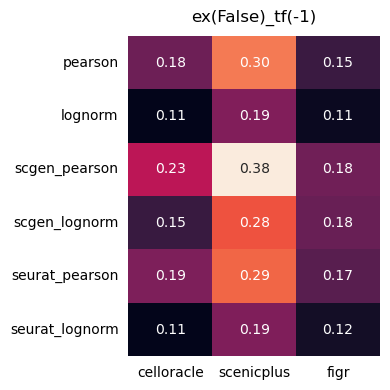

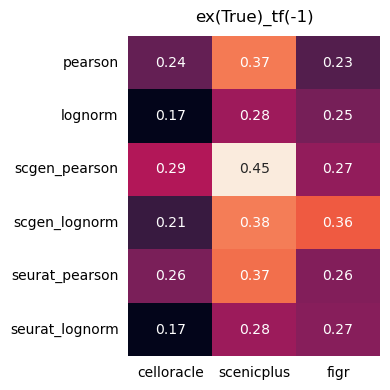

In [3]:
import pandas as pd
output_dir = '../out'
grn_models = ['celloracle','scenicplus','figr']

col = 'ex(False)_tf(-1)'
scores = pd.DataFrame()
for grn in grn_models:
    df = pd.read_csv(f"{output_dir}/{grn}.csv", index_col=0)
    scores[grn] = df[col]
headmap(scores, name=col)

col = 'ex(True)_tf(-1)'
scores = pd.DataFrame()
for grn in grn_models:
    df = pd.read_csv(f"{output_dir}/{grn}.csv", index_col=0)
    scores[grn] = df[col]
headmap(scores, name=col)